In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_excel(r"D:\Kaggle datasets\houseprice.xlsx")

In [3]:
dataset.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [4]:
dataset.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [11]:
dataset["Address"]=dataset["Address"].fillna(dataset["Address"].mode()[0])
dataset['Address'] = dataset['Address'].astype('category').cat.codes


In [12]:
dataset.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [58]:
x = dataset.iloc[:, :-2]
y = dataset["Price"]

In [59]:
# sns.heatmap(data=dataset.corr(),annot=True)
# plt.show()

In [60]:
ss=StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)
x

,Area,Room,Parking,Warehouse,Elevator,Address
0,-0.027611,-1.424368,0.423464,0.305512,0.51978,1.015038
1,-0.027611,-1.424368,0.423464,0.305512,0.51978,1.015038
2,-0.027611,-0.105396,0.423464,0.305512,0.51978,0.237706
3,-0.027611,-0.105396,0.423464,0.305512,0.51978,0.935311
4,-0.027611,-0.105396,0.423464,0.305512,0.51978,0.895448
...,...,...,...,...,...,...
3474,-0.027611,-0.105396,0.423464,0.305512,0.51978,1.154559
3475,-0.027611,-0.105396,0.423464,0.305512,0.51978,-0.001472
3476,-0.027611,-0.105396,-2.361474,-3.273195,-1.92389,0.197843
3477,-0.027611,-0.105396,0.423464,0.305512,0.51978,-1.316956


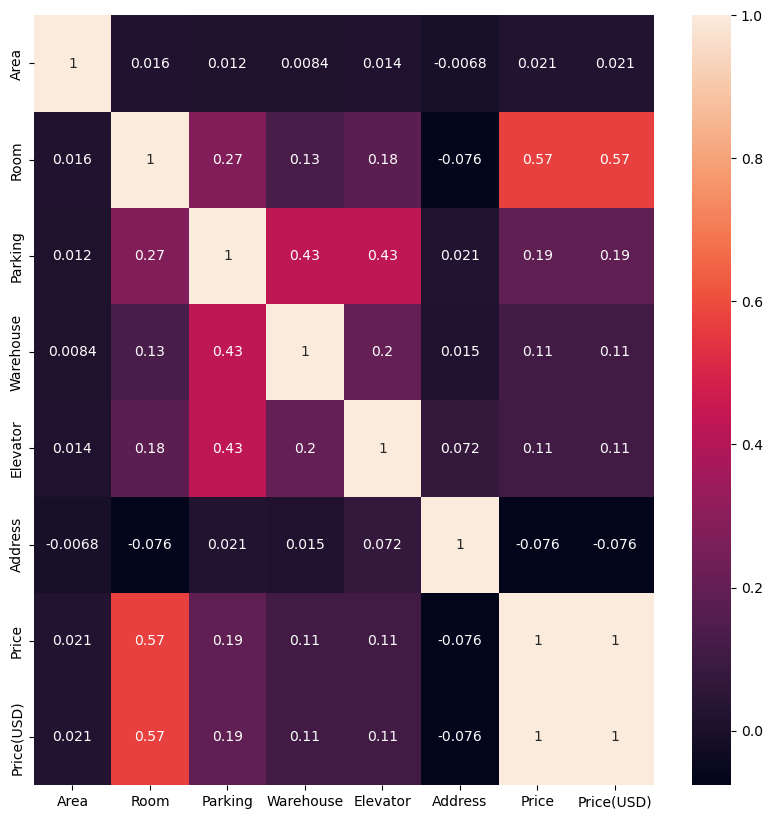

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [62]:
x.shape

(3479, 6)

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=48)

In [94]:
x_train.shape

(2435, 6)

In [95]:
x_test.shape

(1044, 6)

In [137]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Linear Regression

In [138]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

37.49506328474938

In [139]:
lr.coef_

array([ 1.03830029e+08,  4.28516833e+09,  1.90242766e+08,  2.01597699e+08,
        9.85358339e+07, -1.46001943e+08])

In [143]:
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(mean_squared_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_absolute_error(y_test,lr.predict(x_test))))

3833048623.315744
4.518751717060258e+19
61911.61945318297


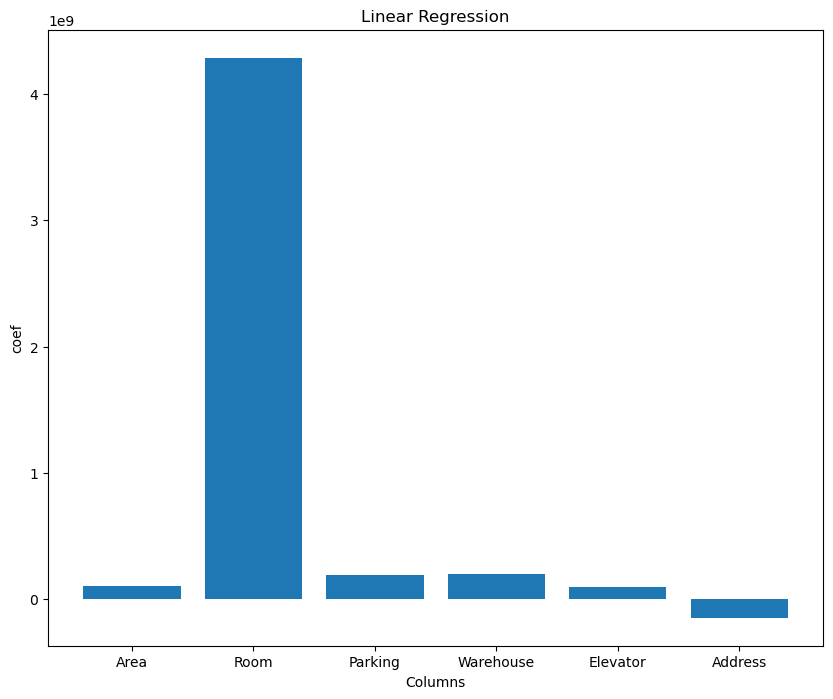

In [136]:
plt.figure(figsize=(10,8))
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.bar(x.columns,lr.coef_)
plt.show()

# Lasso

In [127]:
la=Lasso(alpha=1.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

37.49506328152923

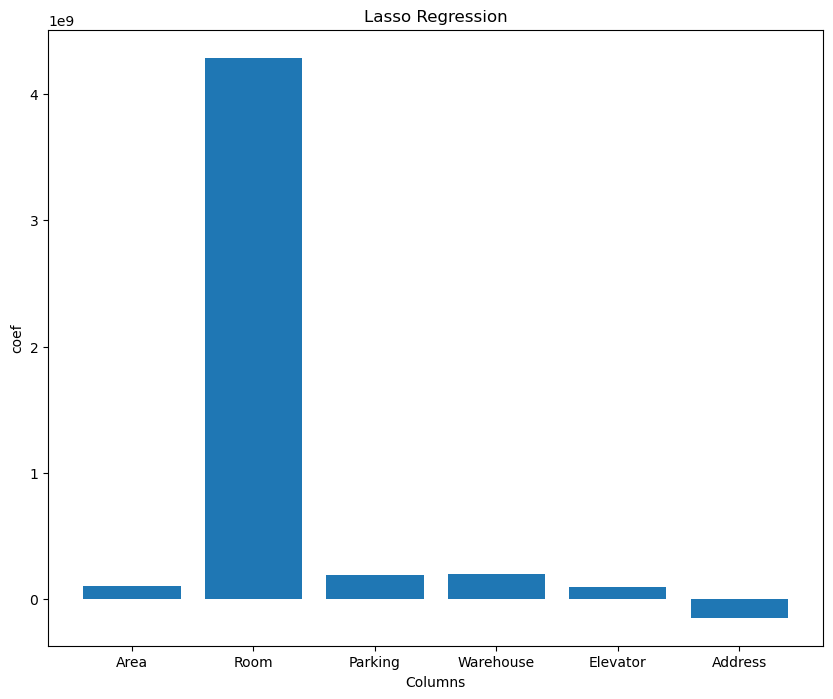

In [128]:
plt.figure(figsize=(10,8))
plt.title("Lasso Regression")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.bar(x.columns,la.coef_)
plt.show()

# Ridge

In [129]:
rg=Ridge(alpha=1.5)
rg.fit(x_train,y_train)
rg.score(x_test,y_test)*100

37.48975630074022

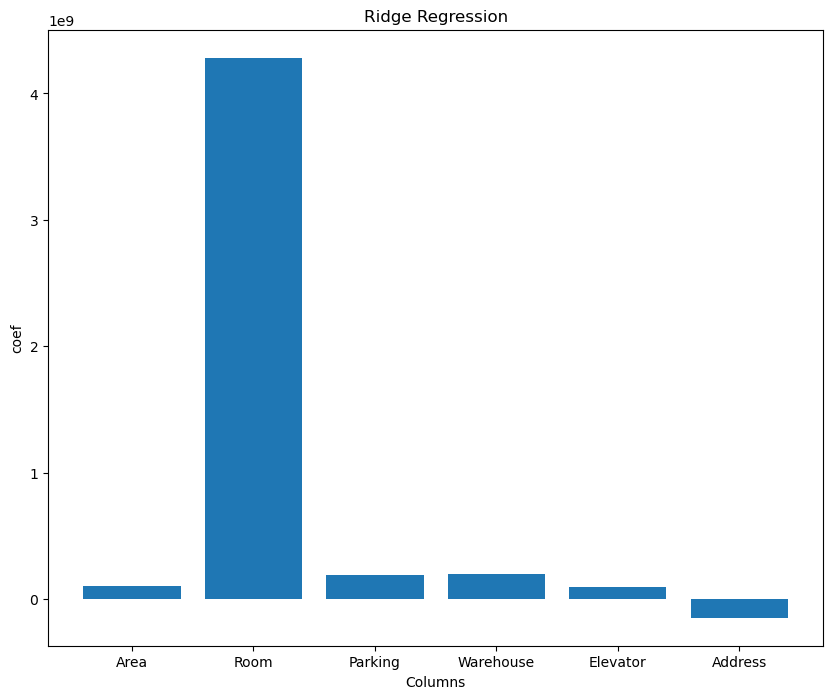

In [130]:
plt.figure(figsize=(10,8))
plt.title("Ridge Regression")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.bar(x.columns,rg.coef_)
plt.show()

# Check the coffecients of all in table

In [144]:
df = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":rg.coef_})

In [145]:
df

,col_name,LinearRegression,Lasso,Ridge
0,Area,1.038300e+08,1.038300e+08,1.038261e+08
1,Room,4.285168e+09,4.285168e+09,4.282214e+09
2,Parking,1.902428e+08,1.902428e+08,1.908379e+08
3,Warehouse,2.015977e+08,2.015977e+08,2.015212e+08
4,Elevator,9.853583e+07,9.853583e+07,9.878530e+07
5,Address,-1.460019e+08,-1.460019e+08,-1.461700e+08
